<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/Furkan_Onat_LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os


In [2]:
from google.colab import files
uploaded = files.upload()

In [0]:
df = pd.read_csv('freMTPL2freq.csv')

# Explanatory Analysis

In [4]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [5]:
df.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [6]:
import sys
!{sys.executable} -m pip install pandas-profiling


In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df).to_notebook_iframe()

profile



TypeError: ignored

In [9]:
# Adding a feature for annualized claim frequency

df['Frequency'] = df['ClaimNb'] /df['Exposure']
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,Frequency
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,10.000000
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1.298701
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1.333333
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,11.111111
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1.190476


In [10]:
df['Frequency'].value_counts(normalize=True)

0.000000     0.949765
1.000000     0.015745
2.000000     0.001621
12.500000    0.000783
2.040816     0.000736
               ...   
3.529412     0.000001
19.512195    0.000001
6.000000     0.000001
4.477612     0.000001
8.108108     0.000001
Name: Frequency, Length: 241, dtype: float64

In [11]:
df['Frequency'].nunique()

241

In [12]:
df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Frequency
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,0.263964
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,4.593915
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,732.000000


In [13]:
df['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
16         1
9          1
8          1
6          1
Name: ClaimNb, dtype: int64

In [14]:
df.dtypes

IDpol         float64
ClaimNb         int64
Exposure      float64
Area           object
VehPower        int64
VehAge          int64
DrivAge         int64
BonusMalus      int64
VehBrand       object
VehGas         object
Density         int64
Region         object
Frequency     float64
dtype: object

#### Model 1 
Target= ClaimNb
Model= DecisionTree Classifier
Evaluation Metric. = Validation Accuracy
Description = Make ClaimNb feature 3-class feature
              Added Frequency Feature


In [19]:
%matplotlib inline
!pip  category_encoders
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

ERROR: unknown command "category_encoders"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_model_1 = df.copy()

In [22]:
df_model_1['ClaimNb'].value_counts(normalize=True)

0     0.949765
1     0.047459
2     0.002631
3     0.000121
4     0.000010
11    0.000004
5     0.000003
16    0.000001
9     0.000001
8     0.000001
6     0.000001
Name: ClaimNb, dtype: float64

In [23]:
df_model_1['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
16         1
9          1
8          1
6          1
Name: ClaimNb, dtype: int64

In [0]:
# I will create a new column for number of claims per policy.
df_model_1['ClaimNb_Adj'] = df_model_1['ClaimNb']

In [25]:
df_model_1.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,Frequency,ClaimNb_Adj
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,10.000000,1
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1.298701,1
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1.333333,1
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,11.111111,1
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1.190476,1


In [26]:
# I modify the new 'ClaimNb' column to have just 3 classes : 'no claim', 'once', 'more than once'. 
df_model_1['ClaimNb_Adj'] = df_model_1['ClaimNb_Adj'].replace({0: 'no claim', 1: 'once', 2: 'more than once', 3: 'more than once', 4: 'more than once', 11: 'more than once', 5: 'more than once', 16: 'more than once', 9: 'more than once', 8: 'more than once', 6: 'more than once'})
df_model_1.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,Frequency,ClaimNb_Adj
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,10.000000,once
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1.298701,once
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1.333333,once
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,11.111111,once
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1.190476,once


In [0]:
# I will use "ClaimNb_Adj" feature as the target for the model
y = df_model_1['ClaimNb_Adj']

In [28]:
# Baseline for the majority class
df_model_1['ClaimNb_Adj'].value_counts(normalize=True)

no claim          0.949765
once              0.047459
more than once    0.002776
Name: ClaimNb_Adj, dtype: float64

In [29]:
# Split for test and train
train, test = train_test_split(df_model_1, train_size=0.80, test_size=0.20, stratify=df_model_1['ClaimNb_Adj'], random_state=42)

train.shape, test.shape

((542410, 14), (135603, 14))

In [30]:
# Split for train and val 
train, val = train_test_split(train, train_size = 0.80, test_size=0.20, stratify=train['ClaimNb_Adj'], random_state=42)

train.shape, val.shape

((433928, 14), (108482, 14))

In [0]:
def wrangle(X):
    # Drop IDpol since it doesn't have any explanatory power
    # Drop ClaimNb and Frequency as they are a function of our target.
    column_drop = ['IDpol','ClaimNb', 'Frequency']
    X = X.drop(columns=column_drop)
    return X

In [0]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [33]:
train.head()

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNb_Adj
473050,0.08,D,10,11,35,50,B2,Regular,1398,R24,no claim
385695,1.00,E,5,6,64,50,B5,Regular,4128,R52,no claim
368650,0.71,A,6,3,41,57,B12,Diesel,18,R74,no claim
32821,1.00,D,4,13,38,78,B1,Regular,1326,R93,no claim
520623,0.87,E,4,1,72,50,B12,Regular,7259,R31,no claim


In [37]:
!pip install --upgrade category_encoders
import category_encoders as ce
# Arranging features matrix and y target vector
target = 'ClaimNb_Adj'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth = 3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

     |████████████████████████████████| 81kB 2.0MB/s 
Validation Accuracy 0.9497704688335392


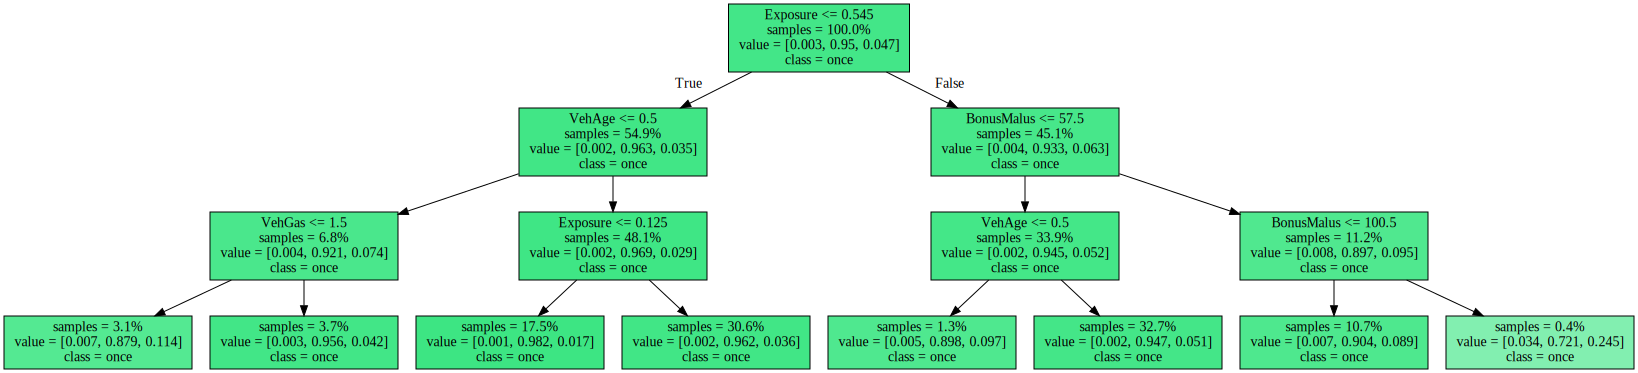

In [39]:
import graphviz 
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,
                          out_file=None,
                          feature_names=X_train.columns,
                          class_names=y_train.unique().astype(str),
                          filled=True,
                           impurity=False,
                           proportion=True
                          )
graphviz.Source(dot_data)
                        
                       

In [40]:
y.value_counts(normalize=True)

no claim          0.949765
once              0.047459
more than once    0.002776
Name: ClaimNb_Adj, dtype: float64

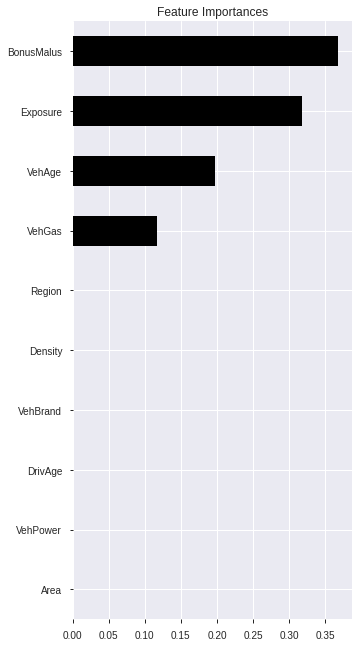

In [41]:
# Getting feature importances
rf = pipeline.named_steps['decisiontreeclassifier']
importances = pd.Series(rf.feature_importances_,X_train.columns)

# plot feature importances
%matplotlib inline

n=11
plt.figure(figsize=(5,n))
plt.title("Feature Importances")
importances.sort_values()[-n:].plot.barh(color='black');


In [42]:
importances.sort_values(ascending=False)

BonusMalus    0.368353
Exposure      0.317980
VehAge        0.196847
VehGas        0.116820
Region        0.000000
Density       0.000000
VehBrand      0.000000
DrivAge       0.000000
VehPower      0.000000
Area          0.000000
dtype: float64

In [43]:
# Predict on Test
y_pred = pipeline.predict(X_test)
y_pred.shape, y_test.shape

((135603,), (135603,))

In [44]:
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))


Train Accuracy 0.949763555244188
Validation Accuracy 0.9497704688335392


In [45]:
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y_test)

print("Accuracy : %.4f%%" % (accuracy * 100.0))

Accuracy : 94.9765%


# Assignment DAY 4

### Partial Dependence Plot

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=72

In [47]:
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox import pdp



     |████████████████████████████████| 57.7MB 65kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=2d095e8749c50020ee4589537ec0b754029d812de5926afcb592c233000bfca6
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [48]:
feature = 'DrivAge'
encoder = ce.OrdinalEncoder()
X_val_encoded = encoder.fit_transform(X_val)
model = DecisionTreeClassifier()
model.fit(X_val_encoded, y_val)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
X_val.head()

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
371231,0.08,B,7,0,70,50,B12,Regular,66,R93
78429,1.00,A,7,10,47,50,B2,Diesel,13,R24
6480,1.00,A,6,4,72,50,B2,Diesel,49,R24
302162,0.08,A,6,11,43,72,B2,Diesel,8,R73
169710,0.90,C,5,10,54,57,B5,Diesel,121,R53


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


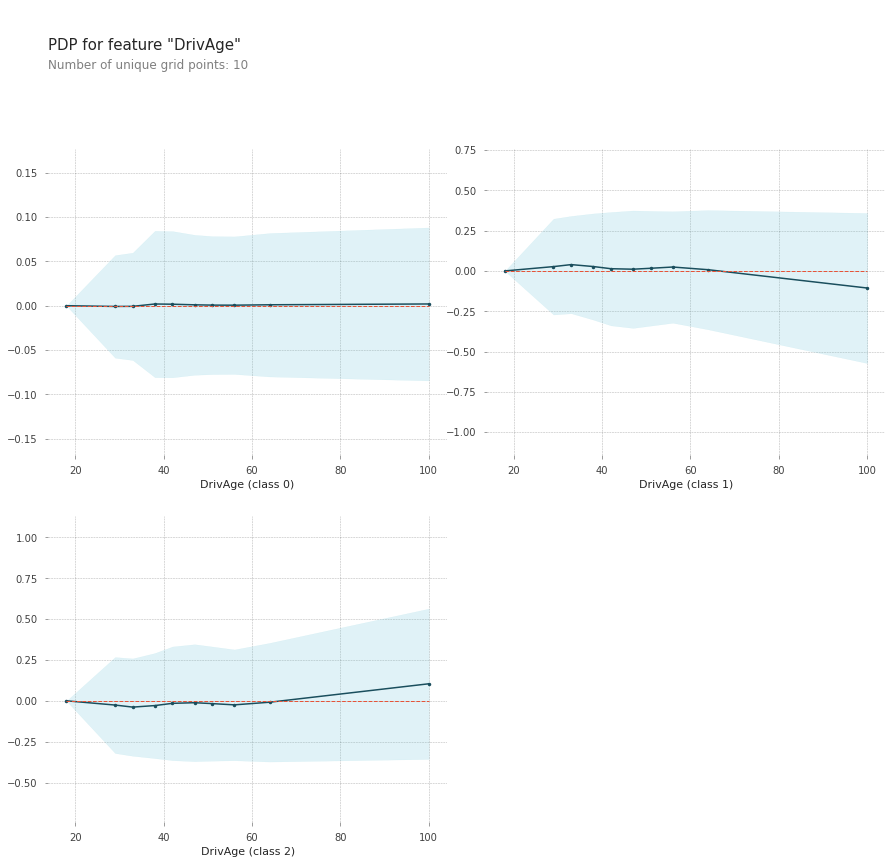

In [50]:
%matplotlib inline
from pdpbox import pdp
feature = 'DrivAge'
pdp_dist = pdp.pdp_isolate(model=model, dataset = X_val_encoded, model_features=X_val_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

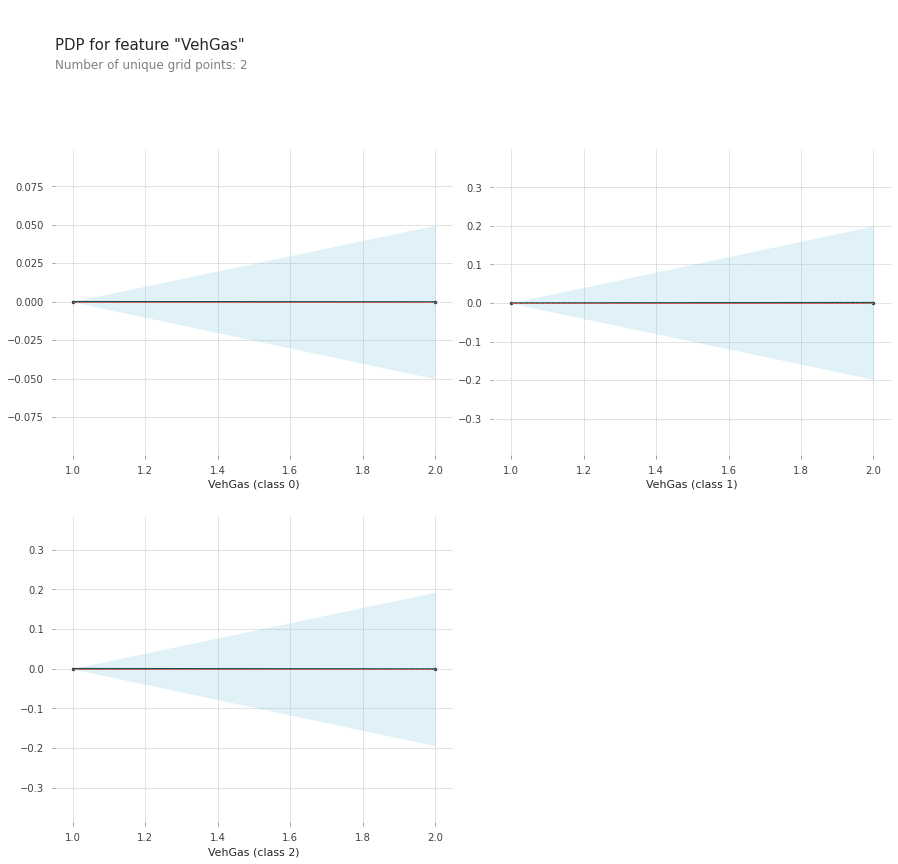

In [51]:
feature = 'VehGas'
pdp_dist = pdp.pdp_isolate(model=model, dataset = X_val_encoded, model_features=X_val.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

### Shapley value plots

In [52]:
pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394122 sha256=ffbce49aedbc331e2723ec913f0a5c7906b4035fdcfcee93774cdbc538c2a4c3
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [53]:
X_train.shape, X_val.shape,X_test.shape

((433928, 10), (108482, 10), (135603, 10))

In [54]:
processor = make_pipeline(
    ce.OrdinalEncoder(), 
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]
model=DecisionTreeClassifier(max_depth = 3)
model.fit(X_train_processed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
row = X_test.iloc[[3094]]
row

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
125884,0.05,A,6,3,60,50,B4,Diesel,21,R52


In [56]:
import shap
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' 
)

AssertionError: ignored

In [0]:
X_train_processed.shape

### May it be possible that the reason shapley plot not working with my model is that my target feature is not binary? 